In [1]:
import xarray as xr
import numpy as np
import cftime
import nc_time_axis
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import ticker, cm
from cftime import datetime 
import matplotlib.colors as colors
import math
import random
import matplotlib.cm as mcm
jet = mcm.get_cmap('jet')
import cartopy.crs as ccrs # CRS stands for "Coordinate reference systems" for map projection
from cartopy.crs import PlateCarree
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from dateutil import tz
import pytz
%matplotlib inline 

In [2]:
filename="Nc_Files/Jianfei_WACCMX_files/waccmx_Fe_Fep_02.nc"
filename2="Nc_Files/Jianfei_WACCMX_files/waccmx_Z3_T_e_02.nc"
ds = xr.open_dataset(filename)
ds2 = xr.open_dataset(filename2)
ds

<xarray.Dataset>
Dimensions:    (lat: 96, lon: 144, lev: 126, ilev: 127, time: 672, nbnd: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lev        (lev) float64 4.055e-10 5.207e-10 6.686e-10 ... 929.6 970.6 992.6
  * ilev       (ilev) float64 3.551e-10 4.559e-10 5.854e-10 ... 985.1 1e+03
  * time       (time) object 0001-02-01 00:00:00 ... 0001-02-28 23:00:00
Dimensions without coordinates: nbnd
Data variables:
    hyam       (lev) float64 ...
    hybm       (lev) float64 ...
    P0         float64 ...
    hyai       (ilev) float64 ...
    hybi       (ilev) float64 ...
    time_bnds  (time, nbnd) object ...
    Fe         (time, lev, lat, lon) float32 ...
    Fep        (time, lev, lat, lon) float32 ...
    PS         (time, lat, lon) float32 ...
Attributes:
    Conventions:               CF-1.0
    source:                    CAM
    case:                      cesm213_FX2000_f19f19mg16_Na_Fe_ion_NOp
    logname:                   wujf
    host:                      
    initial_file:              /home/xuexh/wujf/cesm/case/cesm210_FX2000_f19f...
    topography_file:           /home/database/cesm/inputdata/atm/cam/topo/USG...
    model_doi_url:             https://doi.org/10.5065/D67H1H0V
    time_period_freq:          hour_1
    history:                   Sat Jan 22 12:02:06 2022: ncrcat -c -v Fe,Fep ...
    NCO:                       netCDF Operators version 4.7.5 (Homepage = htt...
    nco_openmp_thread_number:  1

In [3]:
lon = ds.variables['lon']
lat = ds.variables['lat']
lev = ds.variables['lev']

dst = ds.transpose("lev", ...)
Mt = dst.variables["Fe"]

ds2t = ds2.transpose("lev", ...)
temp = ds2t.variables['T']

In [4]:
timee = dst.variables['time']
times = xr.cftime_range(start="0001-02-01", periods=672, freq="1H", calendar="noleap")
times2 = dst["time"].dt.strftime("%Y%m%d %H:%M")

In [5]:
Mtdens = ( Mt * 1e-6 * 100 * lev ) / (1.380503e-23 * temp)

Mtdens #lev: 126 time: 672 lat: 96 lon: 144

<xarray.Variable (lev: 126, time: 672, lat: 96, lon: 144)>
array([[[[1.19375787e-14, 1.19375749e-14, 1.19375736e-14, ...,
          1.19375825e-14, 1.19375812e-14, 1.19375800e-14],
         [1.23930439e-14, 1.24646000e-14, 1.25330106e-14, ...,
          1.22959009e-14, 1.22832920e-14, 1.23250907e-14],
         [1.31328623e-14, 1.26229168e-14, 1.25602890e-14, ...,
          2.14824342e-14, 1.71593164e-14, 1.44940422e-14],
         ...,
         [3.82319085e-15, 3.81068315e-15, 3.80038732e-15, ...,
          3.85555584e-15, 3.84489152e-15, 3.83422066e-15],
         [3.79585862e-15, 3.79444314e-15, 3.79242098e-15, ...,
          3.77433754e-15, 3.78608624e-15, 3.79345999e-15],
         [3.43216051e-15, 3.43216101e-15, 3.43216101e-15, ...,
          3.43216101e-15, 3.43216101e-15, 3.43216101e-15]],

        [[1.07379207e-14, 1.07379169e-14, 1.07379169e-14, ...,
          1.07379220e-14, 1.07379220e-14, 1.07379220e-14],
         [9.70805826e-15, 9.81297591e-15, 9.98076188e-15, ...,
          9.68137474e-15, 9.65456022e-15, 9.65919703e-15],
         [1.02945617e-14, 1.00147965e-14, 9.77832133e-15, ...,
          1.12128659e-14, 1.09009899e-14, 1.05907346e-14],
...
         [3.02913598e-14, 5.18942043e-14, 1.24559319e-13, ...,
          2.50646074e-14, 2.53538359e-14, 2.67081049e-14],
         [3.97422856e-14, 3.81606448e-14, 3.64641767e-14, ...,
          1.22977654e-13, 4.26303790e-14, 4.12528552e-14],
         [1.53788507e-13, 1.53788507e-13, 1.53788507e-13, ...,
          1.53788507e-13, 1.53788507e-13, 1.53788507e-13]],

        [[6.81366678e-11, 6.81365092e-11, 6.81244491e-11, ...,
          6.81366318e-11, 6.81363723e-11, 6.81365885e-11],
         [5.73325544e-11, 5.72263896e-11, 5.69667280e-11, ...,
          5.77754416e-11, 5.74764779e-11, 5.74390756e-11],
         [4.40152072e-11, 4.40162762e-11, 4.39840150e-11, ...,
          4.44816159e-11, 4.41807667e-11, 4.40956186e-11],
         ...,
         [3.02405741e-14, 5.10955809e-14, 1.24182586e-13, ...,
          2.51851412e-14, 2.55121015e-14, 2.67625187e-14],
         [3.99911655e-14, 3.82692389e-14, 3.64548308e-14, ...,
          1.22369624e-13, 4.32335408e-14, 4.16638896e-14],
         [1.60398692e-13, 1.60398692e-13, 1.60398692e-13, ...,
          1.60398692e-13, 1.60398692e-13, 1.60398692e-13]]]])

In [6]:
#Sets up lev / alt axes

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

lowest_p = 1*10**-2
highest_p = 5*10**-5

low_ylim_idx = find_nearest(lev, lowest_p)
high_ylim_idx = find_nearest(lev, highest_p)



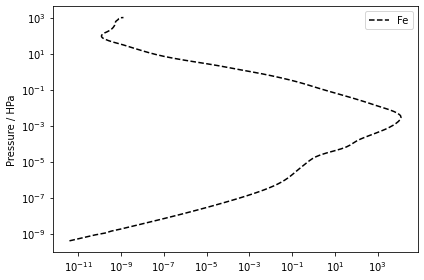

In [15]:
M_glb = Mtdens.mean(('time', 'lon', 'lat'))


fig, ax1 = plt.subplots(figsize=(6, 4))

ax1.plot(M_glb, lev, label='Fe', color='black', linestyle='--')

ax1.set_xscale('log')
ax1.set_ylabel('Density / cm$^{-3}$')

ax.set_title('Global average Fe as a function of pressure')

ax.set_ylim(lev[low_ylim_idx], lev[high_ylim_idx]) 

ax1.set_yscale('log')
ax1.set_ylabel('Pressure / HPa')

ax1.legend()

#--------------------------------------------

plt.tight_layout()

#figname='Fe_glb.png'
#plt.savefig('./Figures/Jianfei_run/'+str(figname))

plt.show()



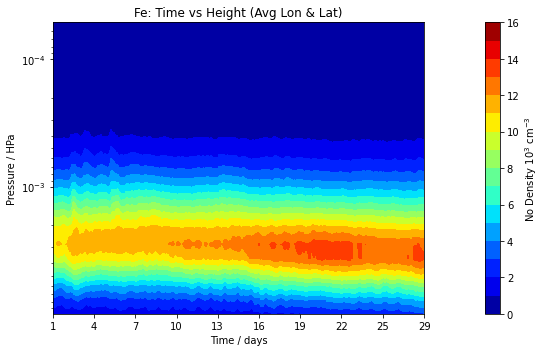

In [7]:
M_vert = Mtdens.mean(('lat', 'lon')) / 1000

#__Mvert__
ticks = np.linspace(0, 16, num=17) #cm-3

fig, ax = plt.subplots(figsize=(8, 5))
C = ax.contourf(times2, lev, M_vert, 
                levels=ticks,
                #locator=ticker.LogLocator(),
                cmap=jet)

ax.set_yscale('log')
ax.set_ylabel('Pressure / HPa')
ax.set_ylim(lev[low_ylim_idx], lev[high_ylim_idx]) 
ax.set_xlabel('Time / days')

ax.set_xticks(np.linspace(0,672,10, dtype=int)) 
ax.set_xticklabels(np.linspace(1,29,10, dtype=int))

cbar = fig.colorbar(C,ticks=ticks[::2], pad=0.12) #,format='%.0e'
cbar.set_label(r'No Density 10$^{3}$ cm$^{-3}$')

plt.title('Fe: Time vs Height (Avg Lon & Lat)')
plt.tight_layout()

figname='Fe: Time vs Height (Avg Lon & Lat)'+'.png'
#plt.savefig('./Figures/Jianfei_run/'+str(figname), dpi = 300)

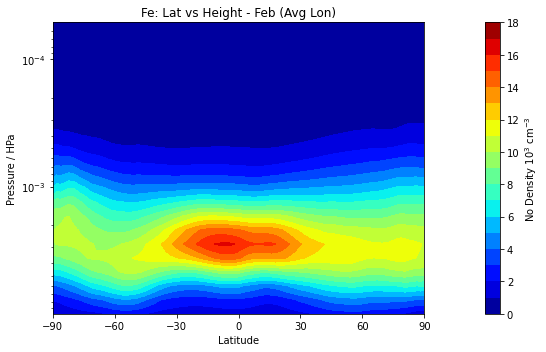

In [8]:
M_latlev = Mtdens.mean(('time', 'lon')) / 1000

#__M_latlev__
ticks = np.linspace(0, 18, num=19) #cm-3

fig, ax = plt.subplots(figsize=(8, 5))
C = ax.contourf(lat, lev, M_latlev, 
                levels=ticks,  
                cmap=jet)

ax.set_yscale('log')
ax.set_ylabel('Pressure / HPa')
ax.set_ylim(lev[low_ylim_idx], lev[high_ylim_idx]) 

ax.set_xlabel('Latitude')
ax.set_xticks(ticks=[-90, -60, -30, 0, 30, 60, 90])



cbar = fig.colorbar(C,ticks=ticks[::2], pad=0.12)
cbar.set_label(r'No Density 10$^{3}$ cm$^{-3}$')

plt.title('Fe: Lat vs Height - Feb (Avg Lon)')
plt.tight_layout()

figname='Fe: Lat vs Height - Feb (Avg Lon)'+'.png'
#plt.savefig('./Figures/Jianfei_run/'+str(figname), dpi = 300)

In [9]:
time_plot_ind = 1
time_plot_str = str(times[time_plot_ind])
time_plot_str2 = str(time_plot_str[0:13])+'h'
print('Plot time = ' + time_plot_str2)

lev_plot_ind = 59   
lev_plot = lev[lev_plot_ind]
lev_plot_str = str("%.2e" % lev_plot)
print('Plot pressure = '+ lev_plot_str)

Plot time = 0001-02-01 01h
Plot pressure = 1.03e-03


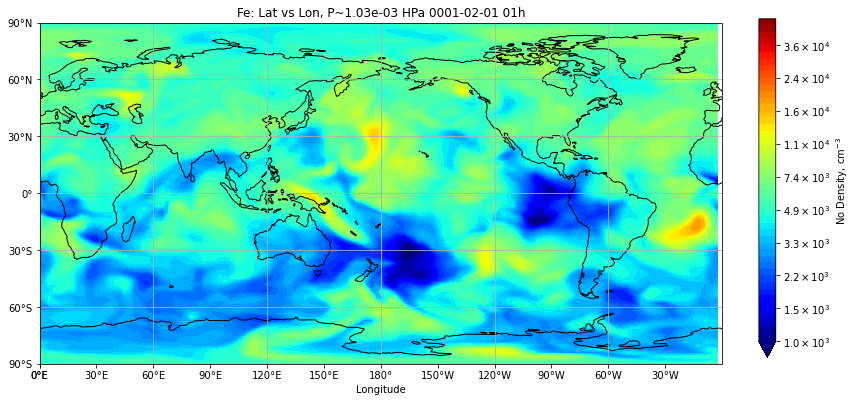

In [10]:
M_latlon = Mtdens[lev_plot_ind,time_plot_ind,:,:] 


#------------------------Plot 1: Mp-----------------------------

ticks = np.geomspace(1*10**3, 5*10**4)

fig = plt.figure(figsize=(12,8))

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_global()

C = plt.contourf(lon, lat, M_latlon, 
                 levels=ticks,
                 transform=ccrs.PlateCarree(),
                 locator=ticker.LogLocator(),
                 extend='min',  #can be 'max' or 'both'
                 cmap=jet)

ax.coastlines() 
ax.gridlines()

ax.set_xlabel('Longitude')
ax.set_xticks([0, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180], crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))

ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
ax.yaxis.set_major_formatter(LatitudeFormatter())  

ax.set_title('Fe: Lat vs Lon, P~' + lev_plot_str + ' HPa '+ time_plot_str2)

#------------------
def fmt(x, pos):
    a, b = '{:.1e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

cbar = fig.colorbar(C,format=ticker.FuncFormatter(fmt), fraction=0.023, pad=0.05)
#-------------------

#cbar = fig.colorbar(C,format='%.0e', fraction=0.023, pad=0.05)  #,ticks=ticks[::2]

cbar.set_label(r'No Density, cm$^{-3}$')

figname='Fe: Lat vs Lon ' + lev_plot_str + ' HPa ' + time_plot_str2 + '.png'
#plt.savefig('./Figures/Jianfei_run/'+str(figname), dpi = 300)
plt.tight_layout()
plt.show()